In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 4)

In [3]:
# Klasy (w kolumnie Label): 0 - normal data (68424), 1 - attack data
df1 = pd.read_csv(r'.\Normal_data_with_ddos.csv') # 48413 DDoS data

In [4]:
df1

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,185.127.17.56-192.168.20.133-443-53648-6,185.127.17.56,443,192.168.20.133,53648,6,5/2/2020 13:58,245230,44,40,124937,1071,9100,0,2839.4773,1839.5083,517,0,26.7750,109.1880,513835.9907,342.5356,2.9546e+03,7.9532e+03,64066,-44,238564,5.5480e+03,1.0446e+04,64066,2,245230,6287.9487,12986.4688,79070,29,0,0,0,0,880,804,179.4234,163.1122,0,9100,1482.4471,1933.2683,3.7375e+06,0,1,0,0,1,0,0,0,0,1500.0952,2839.4773,26.7750,0,0,0,0,0,0,44,124937,40,1071,-1,65535,41,0,0.0000e+00,0.0000e+00,0,0,0.0,0.0000e+00,0,0,0
1,185.127.17.56-192.168.20.133-443-53650-6,192.168.20.133,53650,185.127.17.56,443,6,5/2/2020 13:58,1605449,107,149,1071,439537,517,0,10.0093,67.4967,27300,0,2949.9128,3012.5895,274445.3421,159.4569,6.2959e+03,5.6408e+04,859760,-102,1332121,1.2567e+04,8.3434e+04,861138,2,1603130,10831.9595,73926.6524,861129,1,0,0,0,0,2140,3004,66.6480,92.8089,0,27300,1714.4280,2713.4659,7.3629e+06,0,1,0,0,0,0,0,0,1,1721.1250,10.0093,2949.9128,0,0,0,0,0,0,107,1071,149,439537,-1,64240,4,0,0.0000e+00,0.0000e+00,0,0,0.0,0.0000e+00,0,0,0
2,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.133,35108,192.168.20.2,53,6,5/2/2020 13:58,53078,5,5,66,758,66,0,13.2000,29.5161,638,0,151.6000,276.8263,15524.3227,188.4020,5.8976e+03,1.5185e+04,46232,19,50302,1.2576e+04,2.2522e+04,46251,67,52962,13240.5000,22052.0441,46258,405,0,0,0,0,100,124,94.2010,94.2010,0,638,74.9091,190.8075,3.6407e+04,0,1,0,0,0,0,0,0,1,82.4000,13.2000,151.6000,0,0,0,0,0,0,5,66,5,758,-1,64240,1,0,0.0000e+00,0.0000e+00,0,0,0.0,0.0000e+00,0,0,0
3,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.2,53,192.168.20.133,35108,6,5/2/2020 13:58,6975,1,1,0,0,0,0,0.0000,0.0000,0,0,0.0000,0.0000,0.0000,286.7384,6.9750e+03,0.0000e+00,6975,6975,0,0.0000e+00,0.0000e+00,0,0,0,0.0000,0.0000,0,0,0,0,0,0,20,20,143.3692,143.3692,0,0,0.0000,0.0000,0.0000e+00,0,0,0,0,1,0,0,0,1,0.0000,0.0000,0.0000,0,0,0,0,0,0,1,0,1,0,-1,64239,0,0,0.0000e+00,0.0000e+00,0,0,0.0,0.0000e+00,0,0,0
4,154.59.122.74-192.168.20.133-443-60900-6,192.168.20.133,60900,154.59.122.74,443,6,5/2/2020 13:58,190141,13,16,780,11085,427,0,60.0000,130.0429,2596,0,692.8125,794.1573,62401.0603,152.5184,6.7908e+03,1.2933e+04,38521,-54,86882,7.2402e+03,1.3051e+04,38805,1,190141,12676.0667,15949.0928,38521,1,0,0,0,0,260,344,68.3703,84.1481,0,2596,395.5000,661.6917,4.3784e+05,0,1,0,0,0,0,0,0,1,409.1379,60.0000,692.8125,0,0,0,0,0,0,13,780,16,11085,-1,64240,3,0,0.0000e+00,0.0000e+00,0,0,0.0,0.0000e+00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116832,192.168.20.134-199.128.37.150-0-0-0,199.128.37.150,0,192.168.20.134,0,0,4/2/2020 15:20,2,0,2,0,0,0,0,0.0000,0.0000

In [5]:
df1.describe()

,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,116837.0000,116837.0000,116837.0000,1.1684e+05,116837.0000,116837.0000,1.1684e+05,1.1684e+05,116837.0000,116837.0000,116837.0000,116837.0000,116837.0000,116837.0000,116837.0000,116837.0000,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,116837.0,116837.0000,116837.0,116837.0,116837.0000,116837.0000,116837.0000,1.1684e+05,116837.0000,116837.0000,116837.0000,116837.0000,1.1684e+05,116837.0000,116837.0000,116837.0000,116837.0000,116837.0000,116837.0,116837.0,116837.0,116837.0000,116837.0000,116837.0000,116837.0000,116837.0,116837.0,116837.0,116837.0,116837.0,116837.0,116837.0000,1.1684e+05,116837.0000,1.1684e+05,116837.0,116837.0000,116837.0000,116837.0,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,116837.0000
mean,21879.9805,5700.4316,6.6874,7.9813e+06,14.7100,11.7173,1.9645e+03,2.4176e+04,249.4013,13.0582,89.5535,94.6916,936.0695,15.2244,193.1011,224.0320,1.9508e+05,6.3526e+05,3.1627e+05,8.2208e+05,3.1797e+06,2.1968e+04,7.6600e+06,6.7630e+05,1.1064e+06,3.0362e+06,5.4238e+04,7.4103e+06,5.0774e+05,9.7776e+05,2.9878e+06,2.0459e+04,0.0,0.0651,0.0,0.0,133.6369,211.6137,3006.3801,6.3225e+05,12.4065,1071.1880,148.6180,241.3291,6.6397e+05,0.0208,0.1155,0.0004,0.0651,0.1763,0.0,0.0,0.0,0.9565,165.8051,89.5535,193.1011,0.0,0.0,0.0,0.0,0.0,0.0,14.7100,1.9646e+03,11.7173,2.4182e+04,-1.0,16540.6892,2.2789,0.0,1.1060e+05,8.4034e+04,2.3323e+05,5.0161e+04,2.6406e+06,3.5382e+05,2.9675e+06,2.3280e+06,0.4144
std,24087.3536,15566.5742,7.0494,2.6577e+07,2665.8347,180.7494,1.1947e+05,5.8808e+05,1110.8013,52.6070,448.3130,555.5502,4830.3437,34.2332,575.7508,817.4183,1.1239e+06,8.3569e+05,1.4636e+06,3.2238e+06,1.1415e+07,7.3446e+05,2.6316e+07,3.1671e+06,4.6894e+06,1.1294e+07,1.1689e+06,2.5758e+07,2.2712e+06,4.0537e+06,1.1173e+07,7.2024e+05,0.0,0.2467,0.0,0.0,1953.4799,3727.6632,47274.7719,8.3393e+05,22.9663,4917.8551,391.6154,778.2805,9.4256e+06,0.1426,0.3196,0.0194,0.2467,0.3810,0.0,0.0,0.0,1.2297,414.5476,448.3130,575.7508,0.0,0.0,0.0,0.0,0.0,0.0,2665.8347,1.1944e+05,180.7494,5.8886e+05,0.0,27976.4085,43.7252,0.0,1.0549e+06,8.4923e+05,1.8990e+06,7.8740e+05,1.0303e+07,2.6844e+06,1.1360e+07,9.7366e+06,0.4926
min,0.0000,0.0000,0.0000,-1.5400e+02,0.0000,1.0000,0.0000e+00,0.0000e+00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-2.6271e+05,-1.6949e+04,-1.5400e+02,0.0000e+00,-1.5400e+02,-1.1570e+04,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,-3.0000e+01,-1.5400e+02,-1.5400e+02,0.0000e+00,-1.5400e+02,-1.5400e+02,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0000e+00,0.0000,0.0000,0.0000,0.0000,0.0000e+00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000e+00,1.0000,0.0000e+00,-1.0,-1.0000,0.0000,0.0,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+0

In [6]:
# liczba rekordów w każdej klasie
print(pd.value_counts(df1['Label'], sort = False))# ilość rekordów w klasie 0 (normalny przepływ) jest większa niż w klasie 1 (atak DDoS), co może wpłynąć na wyniki klasyfikacji

0    68424
1    48413
Name: Label, dtype: int64


In [7]:
# Xn = df1.iloc[0:524].copy() 
# Xa = df1.iloc[524:600].copy()
# df = pd.concat([Xn,Xa], ignore_index=True) #łączenie dwóch zbiorów danych w jeden 
# print(pd.value_counts(df1['Label'], sort = False)) #sprawdzenie czy liczba rekordów w klasie 0 i 1 jest taka sama jak w oryginalnym zbiorze danych



In [8]:
df1_cut = df1.drop(["Label","Src IP","Src Port","Dst IP","Dst Port","Protocol","Flow ID","Timestamp"], axis=1) #usuwanie kolumn, które nie będą brane pod uwagę w klasyfikacji
y1 = df1["Label"]
df1_cut

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,245230,44,40,124937,1071,9100,0,2839.4773,1839.5083,517,0,26.7750,109.1880,513835.9907,342.5356,2.9546e+03,7.9532e+03,64066,-44,238564,5.5480e+03,1.0446e+04,64066,2,245230,6287.9487,12986.4688,79070,29,0,0,0,0,880,804,179.4234,163.1122,0,9100,1482.4471,1933.2683,3.7375e+06,0,1,0,0,1,0,0,0,0,1500.0952,2839.4773,26.7750,0,0,0,0,0,0,44,124937,40,1071,-1,65535,41,0,0.0000e+00,0.0000e+00,0,0,0.0,0.0000e+00,0,0
1,1605449,107,149,1071,439537,517,0,10.0093,67.4967,27300,0,2949.9128,3012.5895,274445.3421,159.4569,6.2959e+03,5.6408e+04,859760,-102,1332121,1.2567e+04,8.3434e+04,861138,2,1603130,10831.9595,73926.6524,861129,1,0,0,0,0,2140,3004,66.6480,92.8089,0,27300,1714.4280,2713.4659,7.3629e+06,0,1,0,0,0,0,0,0,1,1721.1250,10.0093,2949.9128,0,0,0,0,0,0,107,1071,149,439537,-1,64240,4,0,0.0000e+00,0.0000e+00,0,0,0.0,0.0000e+00,0,0
2,53078,5,5,66,758,66,0,13.2000,29.5161,638,0,151.6000,276.8263,15524.3227,188.4020,5.8976e+03,1.5185e+04,46232,19,50302,1.2576e+04,2.2522e+04,46251,67,52962,13240.5000,22052.0441,46258,405,0,0,0,0,100,124,94.2010,94.2010,0,638,74.9091,190.8075,3.6407e+04,0,1,0,0,0,0,0,0,1,82.4000,13.2000,151.6000,0,0,0,0,0,0,5,66,5,758,-1,64240,1,0,0.0000e+00,0.0000e+00,0,0,0.0,0.0000e+00,0,0
3,6975,1,1,0,0,0,0,0.0000,0.0000,0,0,0.0000,0.0000,0.0000,286.7384,6.9750e+03,0.0000e+00,6975,6975,0,0.0000e+00,0.0000e+00,0,0,0,0.0000,0.0000,0,0,0,0,0,0,20,20,143.3692,143.3692,0,0,0.0000,0.0000,0.0000e+00,0,0,0,0,1,0,0,0,1,0.0000,0.0000,0.0000,0,0,0,0,0,0,1,0,1,0,-1,64239,0,0,0.0000e+00,0.0000e+00,0,0,0.0,0.0000e+00,0,0
4,190141,13,16,780,11085,427,0,60.0000,130.0429,2596,0,692.8125,794.1573,62401.0603,152.5184,6.7908e+03,1.2933e+04,38521,-54,86882,7.2402e+03,1.3051e+04,38805,1,190141,12676.0667,15949.0928,38521,1,0,0,0,0,260,344,68.3703,84.1481,0,2596,395.5000,661.6917,4.3784e+05,0,1,0,0,0,0,0,0,1,409.1379,60.0000,692.8125,0,0,0,0,0,0,13,780,16,11085,-1,64240,3,0,0.0000e+00,0.0000e+00,0,0,0.0,0.0000e+00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116832,2,0,2,0,0,0,0,0.0000,0.0000,0,0,0.0000,0.0000,0.0000,1000000.0000,2.0000e+00,0.0000e+00,2,2,0,0.0000e+00,0.0000e+00,0,0,2,2.0000,0.0000,2,2,0,0,0,0,0,0,0.0000,1000000.0000,0,0,0.0000,0.0000,0.0000e+00,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0,0,0,0,0,0,0,0,2,0,-1,-1,0,0,0.0000e+00,0.0000e+00,0,0,0.0,0.0000e+00,0,0
116833,2,0,2,0,0,0,0,0.0000,0.0000,0,0,0.0000,0.0000,0.0000,1000000.0000,2.0000e+00,0.0000e+00,2,2,0,0.0000e+00,0.0000e+00,0,0,2,2.0000,0.0000,2,2,0,0,0,0,0,0,0.0000,1000000.0000,0,0,0.0000,0.0000,0.0000e+00,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0,0,0,0,0,0,0,0,2,0,-1,-1,0,0,0.0000e+00,0.0000e+00,0,0,0.0,0.0000e+00,0,0
116834,2,0,2,0,0,0,0,0.0000,0.0000,0,0,0.0000,0.0000,0.0000,1

In [9]:
df1_cut.describe()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.1684e+05,116837.0000,116837.0000,1.1684e+05,1.1684e+05,116837.0000,116837.0000,116837.0000,116837.0000,116837.0000,116837.0000,116837.0000,116837.0000,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,116837.0,116837.0000,116837.0,116837.0,116837.0000,116837.0000,116837.0000,1.1684e+05,116837.0000,116837.0000,116837.0000,116837.0000,1.1684e+05,116837.0000,116837.0000,116837.0000,116837.0000,116837.0000,116837.0,116837.0,116837.0,116837.0000,116837.0000,116837.0000,116837.0000,116837.0,116837.0,116837.0,116837.0,116837.0,116837.0,116837.0000,1.1684e+05,116837.0000,1.1684e+05,116837.0,116837.0000,116837.0000,116837.0,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05
mean,7.9813e+06,14.7100,11.7173,1.9645e+03,2.4176e+04,249.4013,13.0582,89.5535,94.6916,936.0695,15.2244,193.1011,224.0320,1.9508e+05,6.3526e+05,3.1627e+05,8.2208e+05,3.1797e+06,2.1968e+04,7.6600e+06,6.7630e+05,1.1064e+06,3.0362e+06,5.4238e+04,7.4103e+06,5.0774e+05,9.7776e+05,2.9878e+06,2.0459e+04,0.0,0.0651,0.0,0.0,133.6369,211.6137,3006.3801,6.3225e+05,12.4065,1071.1880,148.6180,241.3291,6.6397e+05,0.0208,0.1155,0.0004,0.0651,0.1763,0.0,0.0,0.0,0.9565,165.8051,89.5535,193.1011,0.0,0.0,0.0,0.0,0.0,0.0,14.7100,1.9646e+03,11.7173,2.4182e+04,-1.0,16540.6892,2.2789,0.0,1.1060e+05,8.4034e+04,2.3323e+05,5.0161e+04,2.6406e+06,3.5382e+05,2.9675e+06,2.3280e+06
std,2.6577e+07,2665.8347,180.7494,1.1947e+05,5.8808e+05,1110.8013,52.6070,448.3130,555.5502,4830.3437,34.2332,575.7508,817.4183,1.1239e+06,8.3569e+05,1.4636e+06,3.2238e+06,1.1415e+07,7.3446e+05,2.6316e+07,3.1671e+06,4.6894e+06,1.1294e+07,1.1689e+06,2.5758e+07,2.2712e+06,4.0537e+06,1.1173e+07,7.2024e+05,0.0,0.2467,0.0,0.0,1953.4799,3727.6632,47274.7719,8.3393e+05,22.9663,4917.8551,391.6154,778.2805,9.4256e+06,0.1426,0.3196,0.0194,0.2467,0.3810,0.0,0.0,0.0,1.2297,414.5476,448.3130,575.7508,0.0,0.0,0.0,0.0,0.0,0.0,2665.8347,1.1944e+05,180.7494,5.8886e+05,0.0,27976.4085,43.7252,0.0,1.0549e+06,8.4923e+05,1.8990e+06,7.8740e+05,1.0303e+07,2.6844e+06,1.1360e+07,9.7366e+06
min,-1.5400e+02,0.0000,1.0000,0.0000e+00,0.0000e+00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-2.6271e+05,-1.6949e+04,-1.5400e+02,0.0000e+00,-1.5400e+02,-1.1570e+04,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,-3.0000e+01,-1.5400e+02,-1.5400e+02,0.0000e+00,-1.5400e+02,-1.5400e+02,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0000e+00,0.0000,0.0000,0.0000,0.0000,0.0000e+00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000e+00,1.0000,0.0000e+00,-1.0,-1.0000,0.0000,0.0,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00
25%,2.0000e+00,0.0000,2.0000,0.0000e+00,0.0000e+00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000e+00,5.0441e+02,2.0000e+0

In [10]:
x_mean = np.transpose(pd.DataFrame(df1_cut.mean())) #średnia wartość dla każdej kolumny
x_mean

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,7.9813e+06,14.71,11.7173,1964.5157,24175.7512,249.4013,13.0582,89.5535,94.6916,936.0695,15.2244,193.1011,224.032,195075.6787,635255.8243,316272.8206,822082.4506,3.1797e+06,21967.5731,7.6600e+06,676296.2533,1.1064e+06,3.0362e+06,54237.8257,7.4103e+06,507736.2959,977761.1249,2.9878e+06,20459.4595,0.0,0.0651,0.0,0.0,133.6369,211.6137,3006.3801,632250.3869,12.4065,1071.188,148.618,241.3291,663969.0073,0.0208,0.1155,0.0004,0.0651,0.1763,0.0,0.0,0.0,0.9565,165.8051,89.5535,193.1011,0.0,0.0,0.0,0.0,0.0,0.0,14.71,1964.5865,11.7173,24182.2356,-1.0,16540.6892,2.2789,0.0,110598.653,84033.8749,233233.2046,50161.3883,2.6406e+06,353818.7073,2.9675e+06,2.3280e+06


In [11]:
x_max = np.transpose(pd.DataFrame(df1_cut.max())) #maksymalna wartość dla każdej kolumny

In [12]:
x_min = np.transpose(pd.DataFrame(df1_cut.min())) #minimalna wartość dla każdej kolumny
x_min

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,-154.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-262711.8644,-16949.1525,-154.0,0.0,-154.0,-11570.0,0.0,0.0,0.0,0.0,-30.0,-154.0,-154.0,0.0,-154.0,-154.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
x_std = np.transpose(pd.DataFrame(df1_cut.std())) #odchylenie standardowe dla każdej kolumny
x_std

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,2.6577e+07,2665.8347,180.7494,119469.3455,588084.6298,1110.8013,52.607,448.313,555.5502,4830.3437,34.2332,575.7508,817.4183,1.1239e+06,835691.9911,1.4636e+06,3.2238e+06,1.1415e+07,734455.7095,2.6316e+07,3.1671e+06,4.6894e+06,1.1294e+07,1.1689e+06,2.5758e+07,2.2712e+06,4.0537e+06,1.1173e+07,720238.5491,0.0,0.2467,0.0,0.0,1953.4799,3727.6632,47274.7719,833929.2923,22.9663,4917.8551,391.6154,778.2805,9.4256e+06,0.1426,0.3196,0.0194,0.2467,0.381,0.0,0.0,0.0,1.2297,414.5476,448.313,575.7508,0.0,0.0,0.0,0.0,0.0,0.0,2665.8347,119436.887,180.7494,588860.536,0.0,27976.4085,43.7252,0.0,1.0549e+06,849226.4373,1.8990e+06,787399.9265,1.0303e+07,2.6844e+06,1.1360e+07,9.7366e+06


In [14]:
x_var = np.transpose(pd.DataFrame(df1_cut.var())) #wariancja dla każdej kolumny
x_var

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,7.0632e+14,7.1067e+06,32670.3502,1.4273e+10,3.4584e+11,1.2339e+06,2767.4946,200984.5507,308635.9724,2.3332e+07,1171.9146,331488.9609,668172.7314,1.2632e+12,6.9838e+11,2.1420e+12,1.0393e+13,1.3031e+14,5.3943e+11,6.9251e+14,1.0031e+13,2.1991e+13,1.2756e+14,1.3664e+12,6.6347e+14,5.1581e+12,1.6433e+13,1.2483e+14,5.1874e+11,0.0,0.0608,0.0,0.0,3.8161e+06,1.3895e+07,2.2349e+09,6.9544e+11,527.4506,2.4185e+07,153362.6397,605720.5979,8.8841e+13,0.0203,0.1022,0.0004,0.0608,0.1452,0.0,0.0,0.0,1.5121,171849.6782,200984.5507,331488.9609,0.0,0.0,0.0,0.0,0.0,0.0,7.1067e+06,1.4265e+10,32670.3502,3.4676e+11,0.0,7.8268e+08,1911.8968,0.0,1.1129e+12,7.2119e+11,3.6063e+12,6.2000e+11,1.0615e+14,7.2062e+12,1.2904e+14,9.4801e+13


In [15]:
x_median = np.transpose(pd.DataFrame(df1_cut.median())) #mediana dla każdej kolumny
x_median

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,2440.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1564,1449.2754,953.6667,0.0,1968.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,8.0,20.0,0.2562,1082.6416,0.0,31.0,7.6,12.6557,160.1667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


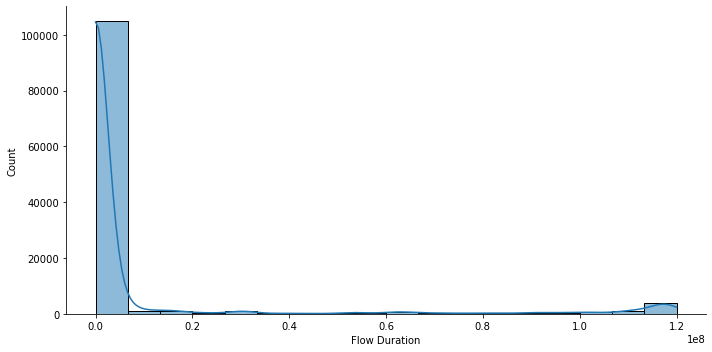

In [16]:
sn.displot(df1_cut['Flow Duration'],bins=18, kde=True,aspect=2) #histogram dla kolumny Flow Duration

IndexError: index 3 is out of bounds for axis 0 with size 3

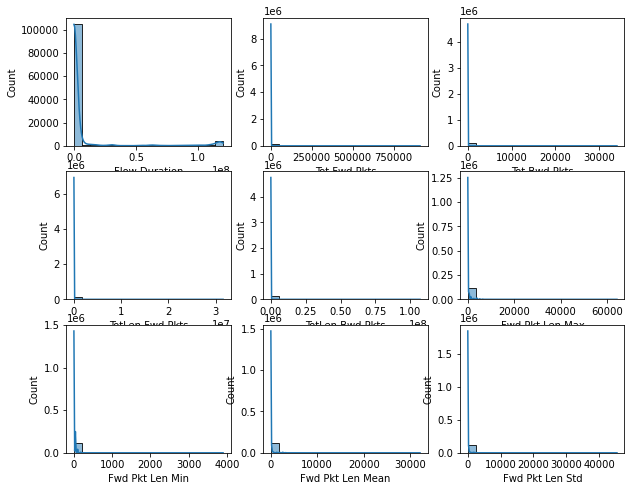

In [17]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 8))

# dodanie wykresów do siatki
for i, col in enumerate(df1_cut.columns):
    sn.histplot(df1_cut[col], bins=18, kde=True, ax=axs[i//3, i%3])

KeyboardInterrupt: 